# Reference
- https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/pytorch_basics/main.py
- https://github.com/pytorch/vision
- https://github.com/DSKSD/Pytorch_Fast_Campus_2018

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

import torch.utils.data as torchdata
import torchvision.transforms as transforms
import torchvision.datasets as vision_datasets

torch.manual_seed(1)

import matplotlib.pyplot as plt
%matplotlib inline

### 1. torch.utils.data.Dataset
- 데이터셋을 핸들링하기 위한 클래스

In [2]:
class CustomDataset(torchdata.Dataset):
    def __init__(self):
        # 데이터 로드, 전처리
        # or 데이터 경로
        self.x= torch.randn(100,1).float()
        self.y= torch.arange(0,100).long()
        
    def __getitem__(self, index):
        # 인덱스에 해당하는 데이터셋 리턴
        return self.x[index], self.y[index]
    
    def __len__(self):
        # 전체 데이터 수
        return len(self.x)

In [3]:
mydataset= CustomDataset()

### 2. torch.utils.data.DataLoader
- 데이터 이터레이터를 생성

In [4]:
train_loader= torchdata.DataLoader(dataset= mydataset,
                                  batch_size=5,
                                  shuffle=True)

for i, batch in enumerate(train_loader):
    print(i, batch)
    if i==1:
        break

0 [tensor([[ 0.3956],
        [-0.1110],
        [-2.5832],
        [-0.4370],
        [-1.4465]]), tensor([78, 40, 90, 51, 27])]
1 [tensor([[ 0.3434],
        [-0.8138],
        [ 0.4676],
        [-0.9823],
        [-3.3312]]), tensor([97, 85, 15, 79, 62])]


### 3. torchvision
- 이미지 데이터를 처리할 때 유용한 라이브러리
- 이미지 데이터 다운로드 기능까지 제공
- https://github.com/pytorch/vision 참고

### 3.1 torchvision dataset

In [5]:
train_dataset= vision_datasets.MNIST(root='../data/MNIST',
                                    train=True,
                                    transform=transforms.ToTensor(),
                                    download=True)

# select one data pair (read data from disk)
image, label= train_dataset[0]
print(image.size())
print(label)

# Data Loader (this provides queue and thread in a very simple way)
train_loader= torchdata.DataLoader(dataset= train_dataset,
                                  batch_size=100,
                                  shuffle=True,
                                  num_workers=2)

for i, batch in enumerate(train_loader):
    print('<iter> : ',i)
    print('<data size> : ' ,batch[0].size()) # CHW
    print('<label size> :' ,batch[1].size())
    
    if i==1:
        break

Processing...
Done!
torch.Size([1, 28, 28])
tensor(5)
<iter> :  0
<data size> :  torch.Size([100, 1, 28, 28])
<label size> : torch.Size([100])
<iter> :  1
<data size> :  torch.Size([100, 1, 28, 28])
<label size> : torch.Size([100])


### 3.2. transform
- 이미지 데이터 전처리를 도와주는 라이브러리
- image-> tensor, resize...

In [6]:
totensor= transforms.ToTensor() # PIL이미지 HWC-> FloatTensor CHW
toimage= transforms.ToPILImage() # FloatTensor CHW -> PIL HWC
toresize= transforms.Resize([100,100]) # PIL이미지 리사이즈

In [7]:
image= toimage(train_dataset[0][0])
print(image.size)
image

(28, 28)


(100, 100)


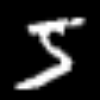

In [8]:
resize_img= toresize(image)
print(resize_img.size)
resize_img

In [9]:
tensor= totensor(image)
print(tensor.size())

torch.Size([1, 28, 28])
